# Car Price Prediction

##### Hi, 
###### Welcome to this jupyter notebook. The objective of this notebook is to best understand logistic regression with the help of the example of employee attrition predictions.  
###### https://www.kaggle.com/HRAnalyticRepository/employee-attrition-data

## Prologue


### About project Mechanic of Machine Learning:
I am a mechanical engineer by educaion. Now, I want to deep dive in the world of Machine Learning, hence the name, mechanic of ML :D. I have taken up this project to understand the in-depth mathematics involved in regularly used ML algorithms. Under this project, I will be sharing useful material and links as I explore this domain.The objective is to learn and spread the same. Stay tuned to my github for updates!

### Business Case: 
The goal of this notebook is to develop a risk model that forecasts the likelihood of employee attrition in a business based on historic data. 
### Notebook objectives:

* To understand and implement logistic regression 
* To visualize and understand the data
* To select features which can best predict costs based on attribute-value pair. 
* To derive conclusions from the data and suggest solutions for business.

### References:
* Logistic Regression: https://www.youtube.com/watch?v=yIYKR4sgzI8
*                      https://www.youtube.com/watch?v=nk2CQITm_eo&t=265s
*                      https://www.youtube.com/watch?v=het9HFqo1TQ
* Likelyhood: https://www.youtube.com/watch?v=pYxNSUDSFH4
* https://www.kaggle.com/gulsahdemiryurek/seaborn-exercise
* https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python
* https://www.kaggle.com/gianzlupko/predicting-employee-churn-proposing-intervention/data


## Index:
1. Exploratory Analysis and Visualization
2. Observations & Hypothesis
3. Linear regression: Training and Testing
4. Conclusion 

### Exploratory Analysis and Visualization

In [2]:
#Importing packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import DBSCAN
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

In [3]:
def num_return (x):
    vals = x.unique()
    for val in range(len(vals)):
        x.replace(to_replace=vals[val], value=val, inplace=True)
        
    return (x)

For all visualiztions and inspiration, please chekout the below kaggle notebook (Also present in github repo): https://www.kaggle.com/gulsahdemiryurek/seaborn-exercise, https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python & https://www.kaggle.com/gianzlupko/predicting-employee-churn-proposing-intervention/data
###### Key Observations :

In [4]:
input_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
input_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


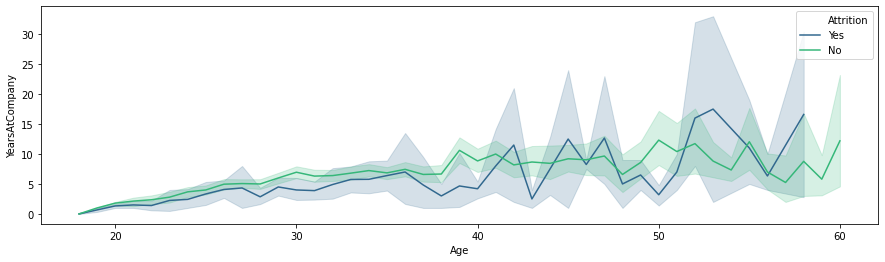

In [7]:
f,ax=plt.subplots(figsize=(15,4))
pal="viridis"
sns.lineplot(x = input_df['Age'], y=input_df['YearsAtCompany'], hue=input_df['Attrition'],palette=pal )

Text(0.5, 0, 'Years At Company')

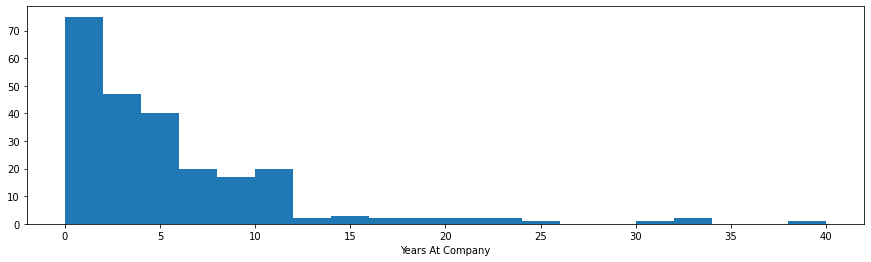

In [8]:
f,ax=plt.subplots(figsize=(15,4))
plt.hist(input_df[input_df['Attrition']=='Yes']['YearsAtCompany'],bins=20)
plt.xlabel("Years At Company")

Text(0.5, 0, 'Years At Company')

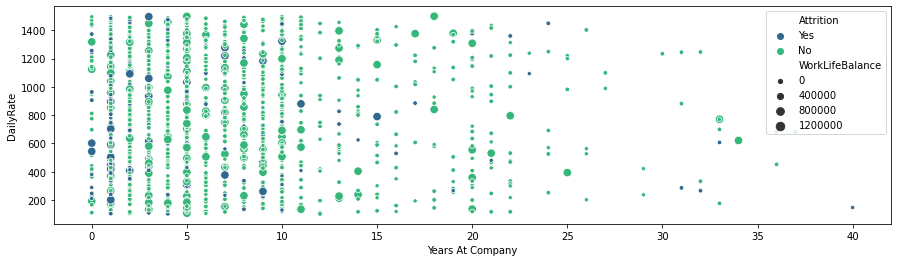

In [9]:
f,ax=plt.subplots(figsize=(15,4))
sns.scatterplot(x=input_df['YearsAtCompany'],y=input_df['DailyRate'],hue=input_df['Attrition'],size=input_df['WorkLifeBalance']**10,palette=pal)

plt.xlabel("Years At Company")

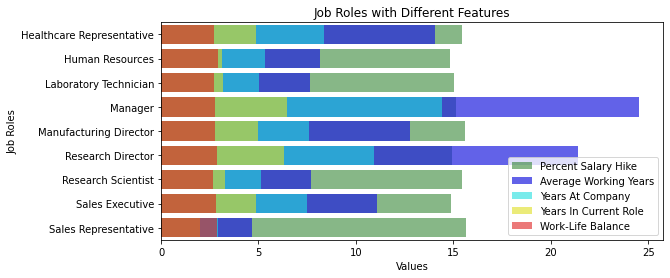

In [10]:
jobrole=pd.DataFrame(input_df.groupby("JobRole")["PercentSalaryHike","YearsAtCompany","TotalWorkingYears","YearsInCurrentRole","WorkLifeBalance"].mean())
f,ax = plt.subplots(figsize = (9,4))
sns.barplot(x=jobrole.PercentSalaryHike,y=jobrole.index,color='green',alpha = 0.5,label='Percent Salary Hike' )
sns.barplot(x=jobrole.TotalWorkingYears,y=jobrole.index,color='blue',alpha = 0.7,label='Average Working Years')
sns.barplot(x=jobrole.YearsAtCompany,y=jobrole.index,color='cyan',alpha = 0.6,label='Years At Company')
sns.barplot(x=jobrole.YearsInCurrentRole,y=jobrole.index,color='yellow',alpha = 0.6,label='Years In Current Role')
sns.barplot(x=jobrole.WorkLifeBalance,y=jobrole.index,color='red',alpha = 0.6,label='Work-Life Balance')

ax.legend(loc='lower right',frameon = True)     
ax.set(xlabel='Values', ylabel='Job Roles',title = "Job Roles with Different Features")
plt.show()

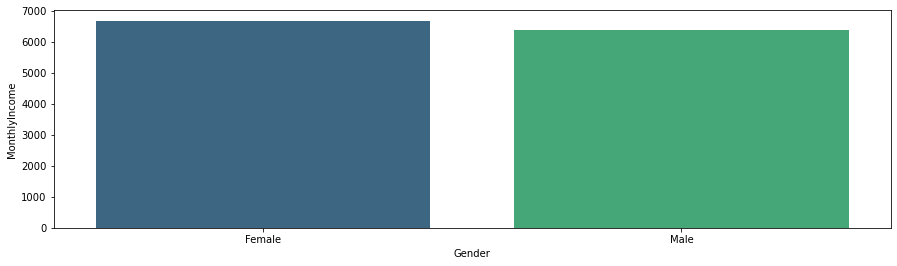

In [11]:
f,ax=plt.subplots(figsize=(15,4))
data = input_df.groupby('Gender').mean().reset_index()
sns.barplot(data=data, x="Gender", y="MonthlyIncome",palette=pal)

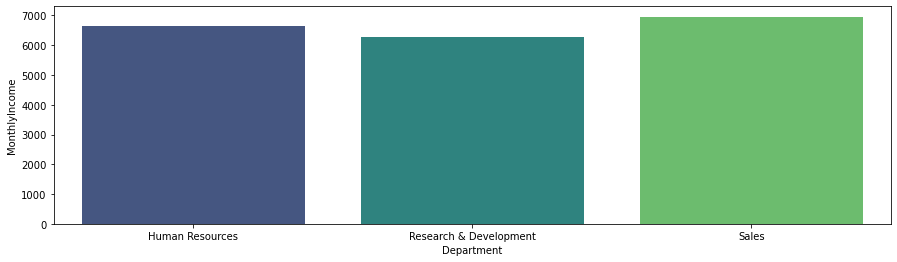

In [12]:
f,ax=plt.subplots(figsize=(15,4))
data = input_df.groupby('Department').mean().reset_index()
sns.barplot(data=data, x="Department", y="MonthlyIncome",palette=pal)

In [13]:
data.columns

Index(['Department', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

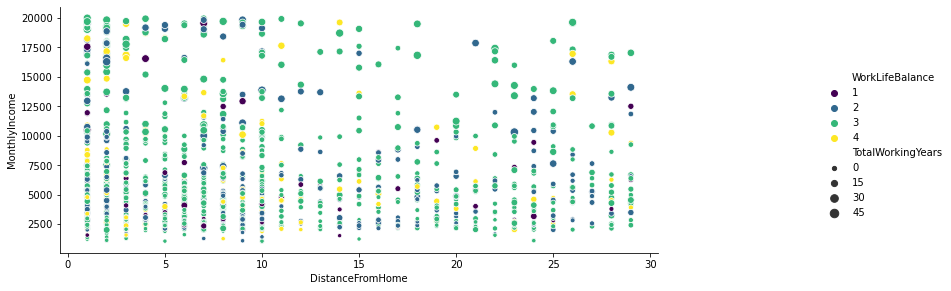

In [14]:
# f,ax=plt.subplots(figsize=(15,10))
data = input_df
g = sns.relplot(data=data, x="DistanceFromHome", y="MonthlyIncome",hue='WorkLifeBalance',size='TotalWorkingYears',palette=pal)
g.fig.set_size_inches(15,4)

In [15]:
#Taking only relevant values
input_df = input_df[['Age','Attrition','BusinessTravel','DailyRate','DistanceFromHome','Education',
                     'EnvironmentSatisfaction','Gender','MaritalStatus','NumCompaniesWorked',
                     'OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
                     'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
                     'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
input_df[['Attrition','BusinessTravel','OverTime','Gender','MaritalStatus']]=input_df[[
    'Attrition','BusinessTravel','OverTime','Gender','MaritalStatus']].apply(num_return)

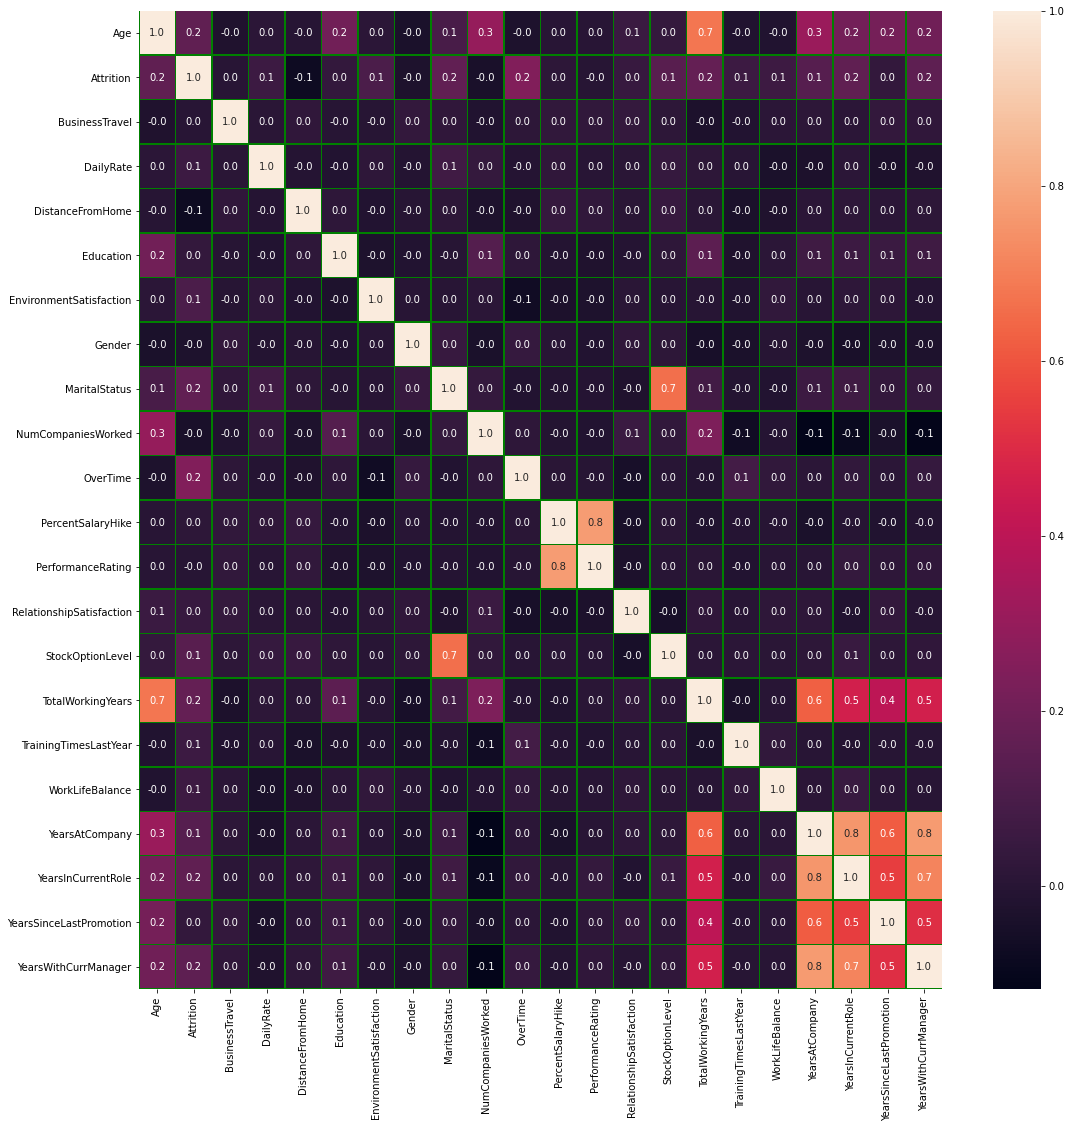

In [16]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(input_df.corr(),annot=True,linewidths=0.5,linecolor="green",fmt=".1f",ax=ax)

In [17]:
#Testing
from scipy import stats

t2, p2=stats.ttest_ind(input_df[input_df['Attrition']==1],input_df[input_df['Attrition']==0])
print("p-value = " + str(p2.mean()))

p-value = 0.15696323344174423


## Observations & Hypothesis:

1. The attrition rate is unrelated to age.
2. HR review parameters are higly corelated to attrition.(Check linked notebook for clarification)
3. Employee attrition is high at after 5 years of service
4. The p value between the datasets of attrition and non attrition is very low, indicating change in behaviour of data.  
5. Lets progress considering attrition is department independent. 

In [18]:
from sklearn.feature_selection import RFE
X = input_df.drop('Attrition',axis=1)
y = input_df['Attrition']
model = LogisticRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(X, y)
print('Selected features: %s' % list(X.columns[rfe.support_]))
Selected_features = list(X.columns[rfe.support_])

Selected features: ['EnvironmentSatisfaction', 'Gender', 'MaritalStatus', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion']


In [19]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

Train/Test split results:
LogisticRegression accuracy is 0.840
LogisticRegression log_loss is 0.408
LogisticRegression auc is 0.710


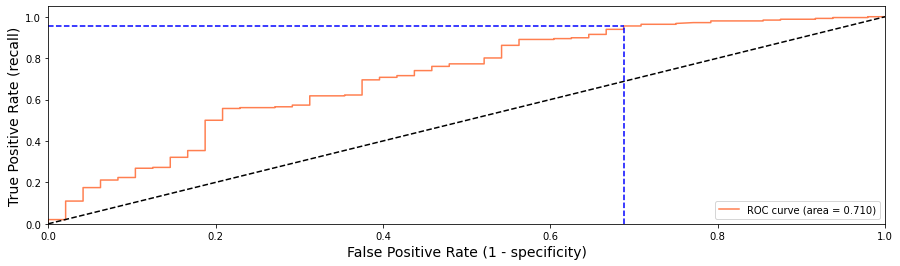

Using a threshold of 0.654 guarantees a sensitivity of 0.955 and a specificity of 0.312, i.e. a false positive rate of 68.75%.


In [20]:
X = input_df[Selected_features]
y = input_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba)) #Refer not -> log likelyhood
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95
f,ax=plt.subplots(figsize=(15,4))
# plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))